In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('data/healthcare/diabetesBayessianRegressed.csv',sep=';')

In [38]:
def get_histogram_step(df: pd.DataFrame, label: str, step: int):
    fmax = int(df[label].max())
    fmin = int(df[label].min())
    lhistogram = []
    ldomain = []
    for x in range(fmin, fmax - step, step):
        temp = (df[label] >= x) & (df[label] < x + step)
        lhistogram.append(temp.sum())
        ldomain.append(x)
    plt.plot(ldomain, lhistogram)
    plt.bar(ldomain, lhistogram)

In [39]:
def get_histogram_bins(df: pd.DataFrame, label: str, bins: list):
    bins.insert(0, df[label].min())
    bins.append(df[label].max())
    plt.hist(df[label], bins)
    #fmin = df[label].min()
    #bins.insert(0,fmin)
    ##fmax = df[label].max()
    #bins.append(fmax)
   # print('min:',fmin,'max:',fmax)
    
    # fmax = df[label].max()
    # fmin = df[label].min()
    # lhistogram = []
    # ldomain = []
    # print(bins)
    # tempMin = (df[label]>=fmin) & (df[label]<bins[0])
    # lhistogram.append(tempMin.sum())
    # ldomain.append(fmin)

    # tempMax = (df[label]<=fmax) & (df[label]>bins[-1])

    # for x in range (0,len(bins)-1):
    #     temp = (df[label]>=bins[x]) & (df[label]<bins[x+1])
    #     lhistogram.append(temp.sum())
    #     ldomain.append(bins[x])
    # lhistogram.append(tempMax.sum())
    # ldomain.append(fmax)
    # print(ldomain)
    # print(lhistogram)

    # ldomainwidth = []
    # for x in range(0,len(ldomain)-1):
    #     ldomainwidth.append(ldomain[x+1]-ldomain[x])
    # ldomainwidth.append(fmax-ldomain[-1])
    # print(ldomainwidth)
    # plt.plot(ldomain,lhistogram)
    #plt.hist
    #plt.bar(ldomain,lhistogram,align='edge',width=ldomainwidth)


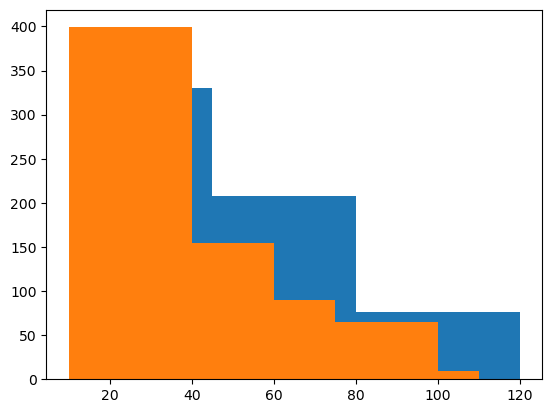

In [40]:
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction']*100
#get_histogram_step(data,'DiabetesPedigreeFunction',5)
#plt.figure()
#plt.figure()

get_histogram_bins(data, 'DiabetesPedigreeFunction', [20, 45, 80, 120])
get_histogram_bins(data, 'DiabetesPedigreeFunction', [10, 40, 60, 75, 100, 110])
#get_histogram_bins(data,'Pregnancies',[3,7,11]) 
#get_histogram_bins(data,'Pregnancies',[1,3,6,9,12])
#get_histogram_step(data,'Pregnancies',1) 

In [41]:
# import bambi as bmb
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import pymc as pm
# import seaborn as sns


# sns.set(style="darkgrid", palette="muted")


# def simulate_linear_data(
#     start, stop, N, beta_0, beta_1, eps_mean, eps_sigma_sq
# ):
#     """
#     Simulate a random dataset using a noisy
#     linear process.

#     Parameters
#     ----------
#     N: `int`
#         Number of data points to simulate
#     beta_0: `float`
#         Intercept
#     beta_1: `float`
#         Slope of univariate predictor, X

#     Returns
#     -------
#     df: `pd.DataFrame`
#         A DataFrame containing the x and y values
#     """
#     # Create a pandas DataFrame with column 'x' containing
#     # N uniformly sampled values between 0.0 and 1.0
#     df = pd.DataFrame(
#         {"x": 
#             np.linspace(start, stop, num=N)
#         }
#     )
#     # Use a linear model (y ~ beta_0 + beta_1*x + epsilon) to 
#     # generate a column 'y' of responses based on 'x'
#     df["y"] = beta_0 + beta_1*df["x"] + np.random.RandomState(s).normal(
#         eps_mean, eps_sigma_sq, N
#     )
#     return df


# def plot_simulated_data(df):
#     """
#     Plot the simulated data with sns.lmplot().

#     Parameters
#     ----------
#     df: `pd.DataFrame`
#         A DataFrame containing the x and y values
#     """
#     # Plot the data, and a frequentist linear regression fit
#     # using the seaborn package
#     sns.lmplot(x="x", y="y", data=df, height=10)
#     plt.xlim(0.0, 1.0)
#     plt.show()


# def glm_mcmc_inference(df, iterations=5000):
#     """
#     Calculates the Markov Chain Monte Carlo trace of
#     a Generalised Linear Model Bayesian linear regression 
#     model on supplied data.

#     Parameters
#     ----------
#     df: `pd.DataFrame`
#         DataFrame containing the data
#     iterations: `int`
#         Number of iterations to carry out MCMC for
#     """
#     # Create the glm using the Bambi model syntax
#     model = bmb.Model("y ~ x", df)

#     # Fit the model using a NUTS (No-U-Turn Sampler) 
#     trace = model.fit(
#         draws=5000,
#         tune=500,
#         discard_tuned_samples=True,
#         chains=1, 
#         progressbar=True)
#     return trace


# def plot_glm_model(trace):
#     """
#     Plot the trace generated from fitting the model. 

#     Parameters
#     ----------
#     trace: `tracepymc.backends.base.MultiTrace`
#         A MultiTrace or ArviZ InferenceData object that contains the samples.
#     """
#     pm.plot_trace(trace)
#     plt.tight_layout()
#     plt.show()


# def plot_regression_lines(trace, df, N):
#     """
#     Plot the simulated data with True and estimated regression lines.

#     Parameters
#     ----------
#     trace: `tracepymc.backends.base.MultiTrace`
#         A MultiTrace or ArviZ InferenceData object that contains the samples.
#     df: `pd.DataFrame`
#         DataFrame containing the data
#     N: `int`
#         Number of data points to simulate
#     """
#     fig, ax = plt.subplots(figsize=(7, 7))
#     # define x axis ticks
#     x = np.linspace(0, 1, N)
#     # plot simulated data observations
#     ax.scatter(df['x'], df['y'])
#     # extract slope and intercept draws from PyMC trace
#     intercepts = trace.posterior.Intercept.to_numpy()[0]
#     slopes = trace.posterior.x.to_numpy()[0]
#     # plot 100 random samples from the slope and intercept draws
#     sample_indexes = np.random.randint(len(intercepts), size=100)
#     for i in sample_indexes:
#         y_line = intercepts[i] + slopes[i] * x
#         ax.plot(x, y_line, c='black', alpha=0.07)
#     # plot true regression line
#     y = beta_0 + beta_1*x
#     ax.plot(x, y, label="True Regression Line", lw=3., c="green")
#     ax.legend(loc=0)
#     ax.set_xlim(0.0, 1.0)
#     ax.set_ylim(0.0, 4.0)
#     plt.show()


# if __name__ == "__main__":
#     # These are our "true" parameters
#     beta_0 = 1.0  # Intercept
#     beta_1 = 2.0  # Slope

#     # Simulate 100 data points between 0 and 1, with a variance of 0.5
#     start = 0
#     stop = 1
#     N = 100
#     eps_mean = 0.0
#     eps_sigma_sq = 0.5

#     # Fix Random Seed
#     s = 42

#     # Simulate the "linear" data using the above parameters
#     df = simulate_linear_data(
#         start, stop, N, beta_0, beta_1, eps_mean, eps_sigma_sq
#     )
#     # Plot the simulated data
#     plot_simulated_data(df)

#     # Fit the GLM 
#     trace = glm_mcmc_inference(df, iterations=5000)
#     # Plot the GLM
#     plot_glm_model(trace)
#     plot_regression_lines(trace, df, N)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
import numpy as np   
#Defining function for regressing data
def regressBayess(data:pd, Column_to_fix:str):
    #Constant, columns with data used for regression
    data_col_for_model = ['Pregnancies','Insulin','DiabetesPedigreeFunction','Age','Outcome']
    subset_names = data_col_for_model
    #Preparing subset with required data (good data + column with incomplete data)
    subset_names.append(Column_to_fix)
    data_subset = data[subset_names]
    #Logical condition for filtering bad data (based on dataset analysis)
    data_filter = (data_subset[Column_to_fix] != 0)
    #Preparing subset w/o incomplete data #data_subset[Column_to_fix] == 0
    data_for_regresion = data_subset.loc[~data_filter].drop(columns=Column_to_fix)
    #Subset which will be updated with generated data
    data_for_after_regresion = data_subset.loc[~data_filter]
    good_rows_x = data_subset.loc[data_filter].drop(columns=Column_to_fix)
    good_rows_y = data_subset[Column_to_fix].loc[data_filter]

    #Random state for stabilizing results
    X_train, X_test, y_train, y_test = train_test_split(good_rows_x, good_rows_y, test_size = 0.15, random_state = 37)

    #Creating model
    model = BayesianRidge()
    model.fit(X_train, y_train)

    #Predicting data with regression
    prediction = model.predict(X_test)

    #Generating R2 score
    print(f"R2 score :", r2_score(y_test, prediction))
    fixed_data = model.predict(data_for_regresion)
    data_for_after_regresion[Column_to_fix] = fixed_data
    data[Column_to_fix].loc[~data_filter] = fixed_data

    #Column_to_fix = 'BMI'
    #data_for_model = list(data.drop(columns = Column_to_fix).columns)
    #print(data_for_model)
    #X = data[['Pregnancies','Insulin','DiabetesPedigreeFunction','Age','Outcome']]
    #y = data['Glucose']
    #print('X\n',X)
    #print('y\n',y)
    # print(X)
    #X = np.reshape(X,(768,5))

    #X = np.swapaxes(X,0,1)

    # print(X)
    # print(y)
    # Splitting dataset into training and testing sets

In [43]:
regressBayess(data,'Glucose')
regressBayess(data,'BMI')
regressBayess(data,'BloodPressure')

_SavePath = 'data/healthcare/diabetesBayessianRegressed.csv'
data.to_csv(path_or_buf=_SavePath, sep=';')

R2 score : 0.34523222376964724
R2 score : 0.1419697231245619
R2 score : 0.13617611148736886
